In [18]:
%load_ext autoreload
%autoreload 2
from methods2final import * 
sc.settings.verbosity = 3  
sc.settings.set_figure_params(dpi=160)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
adata = sc.read_h5ad("../dat/write/der20.h5ad")
adata

AnnData object with n_obs × n_vars = 4249 × 15086 
    obs: 'ID', 'cell', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_colors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [20]:
batch_size = 64
dataset = torch.tensor(adata.X)
tensor_max_value = torch.max(dataset)
dataset = dataset/tensor_max_value
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [21]:
vae = VAE2(image_size=15086)
if torch.cuda.is_available():
    print("Model on GPU")
    vae.cuda()
vae

Model on GPU


RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable

In [9]:
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
train(data_loader, vae, optimizer, batch_size, epochs=100)

RuntimeError: CUDA error: device-side assert triggered

In [75]:
rec_X = vae(to_var(dataset))
print(len(rec_X[0]))
rec_X = rec_X[0].data.cpu()
X = (rec_X*tensor_max_value).detach().numpy()
X.shape
adata.X = X

4249


In [76]:
sc.pl.highest_expr_genes(adata, n_top=20)

MemoryError: 

computing PCA on highly variable genes


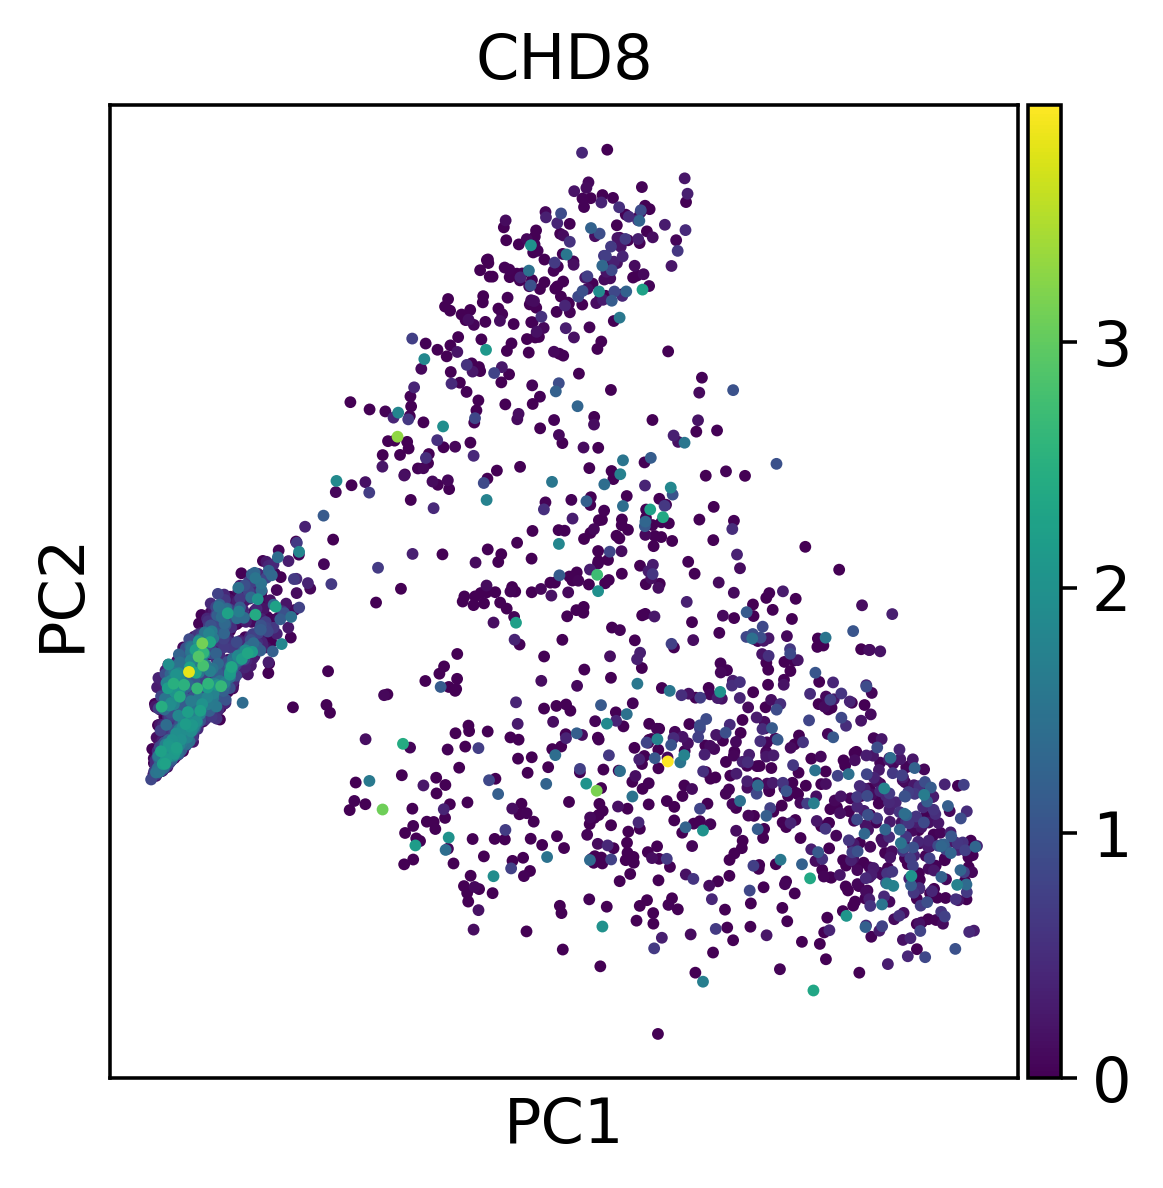

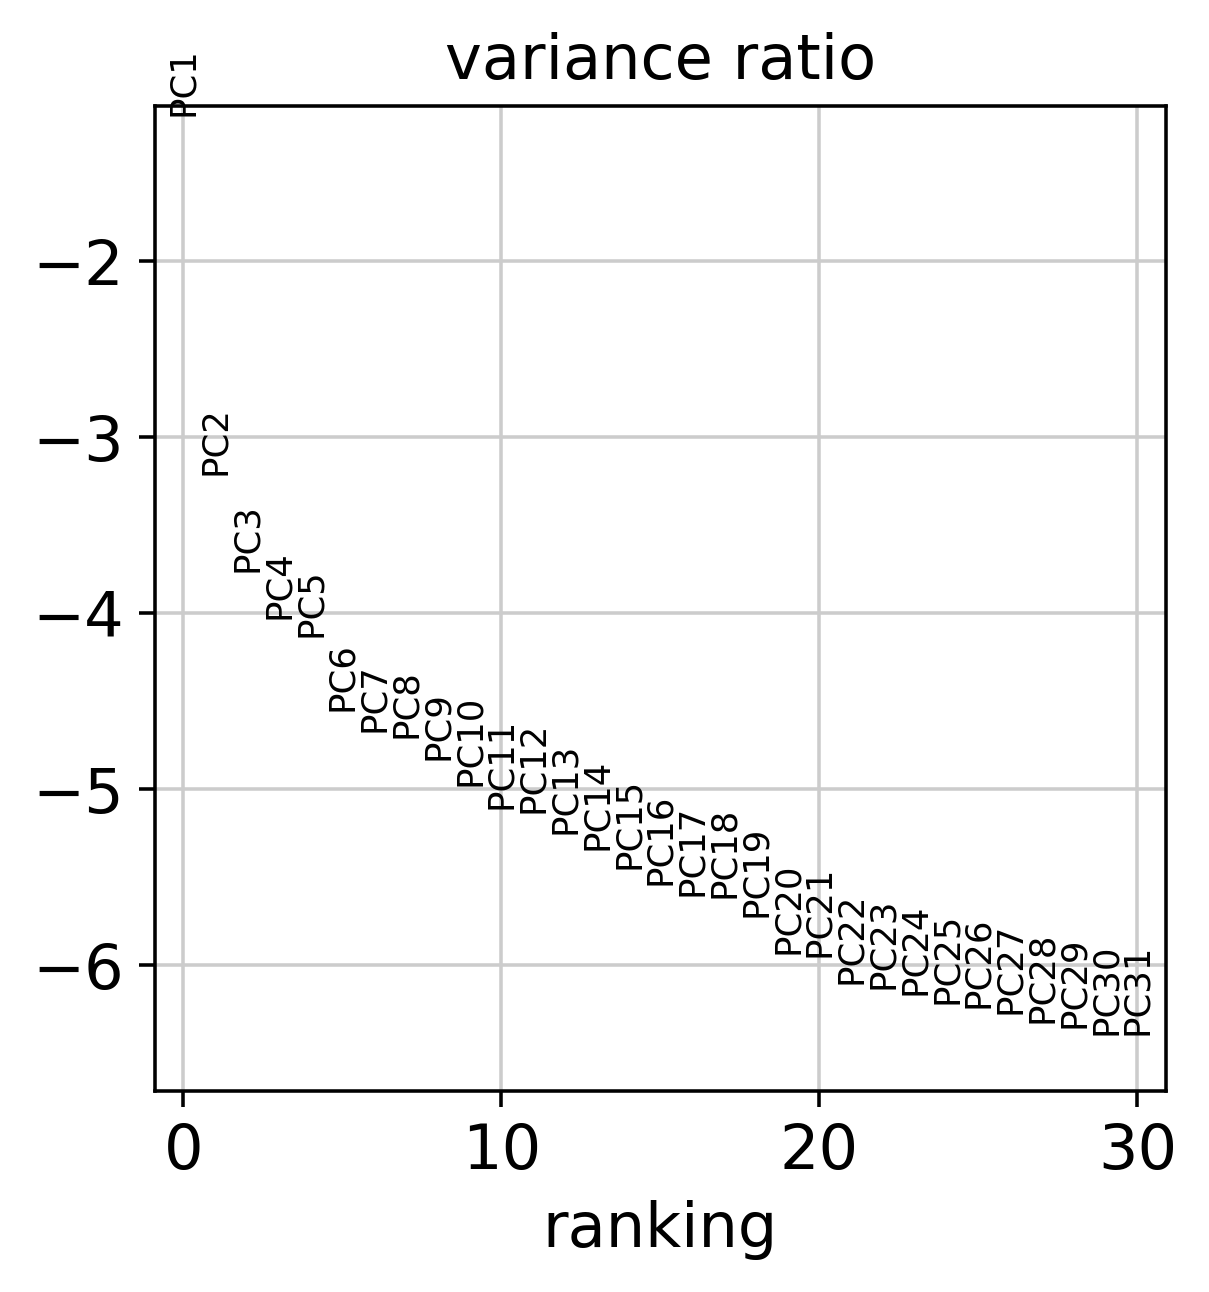

In [77]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CHD8')
sc.pl.pca_variance_ratio(adata, log=True)

In [2]:
sc.tl.tsne(adata, use_rep='X')
sc.pl.tsne(adata, color='cell')

NameError: name 'sc' is not defined

In [79]:
codes = vae.encoder(to_var(dataset))
codes = codes.cpu().detach().numpy()
codes.shape

(4249, 10)

In [80]:
adata.obsm["X_code400"] = codes

In [81]:
sc.tl.tsne(adata, use_rep='X_code400')

computing tSNE
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:17.41) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


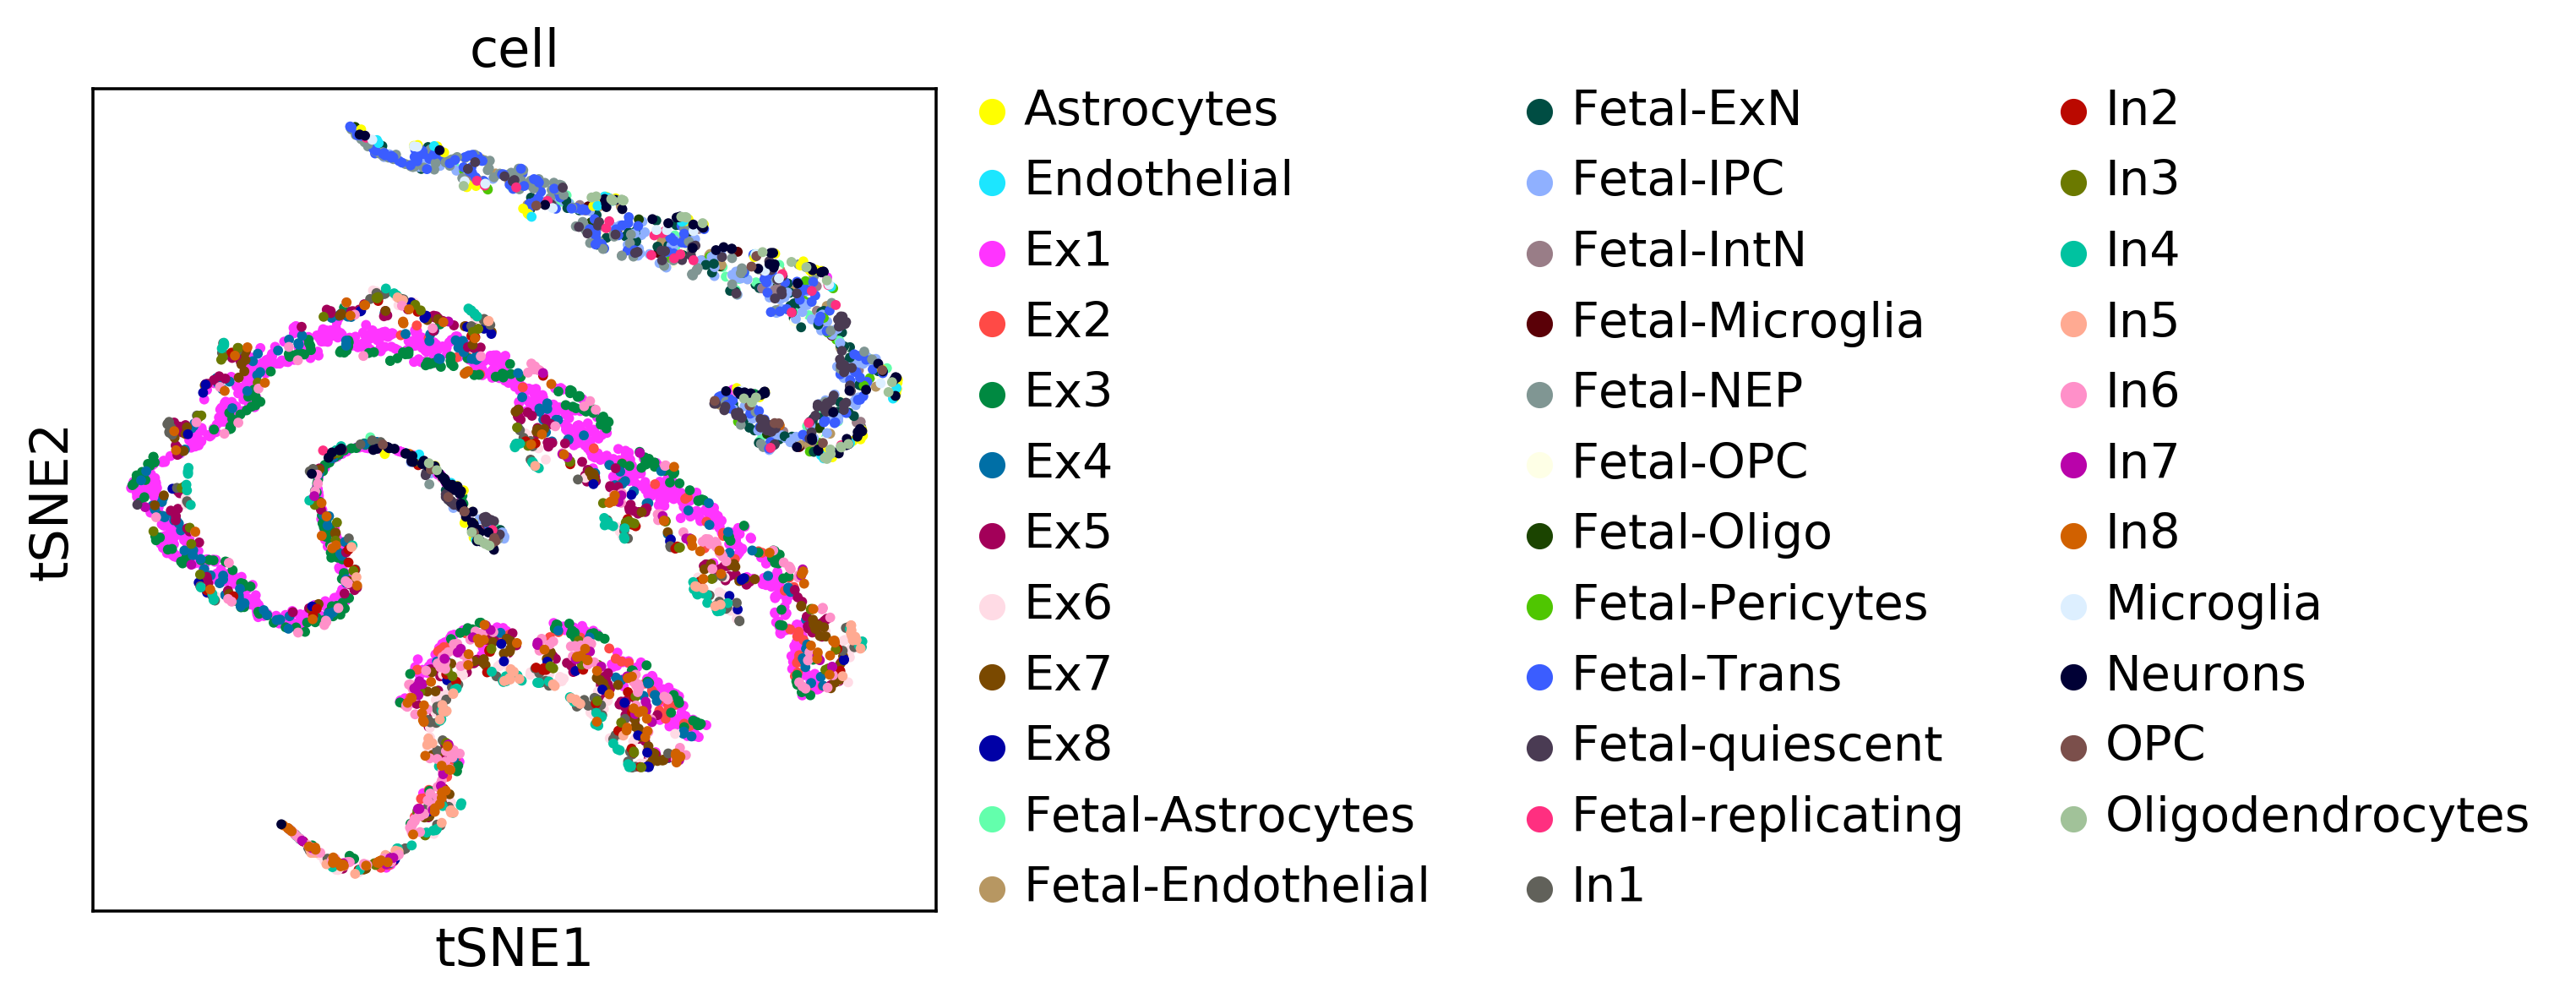

In [82]:
sc.pl.tsne(adata, color='cell')

In [1]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage = "average", n_clusters=10)
clustering.fit(adata)

NameError: name 'adata' is not defined

In [58]:
X, Y = [], []
for x,y in adata.obsm["X_code400"]:
    X.append(x)
    Y.append(y)

ValueError: too many values to unpack (expected 2)

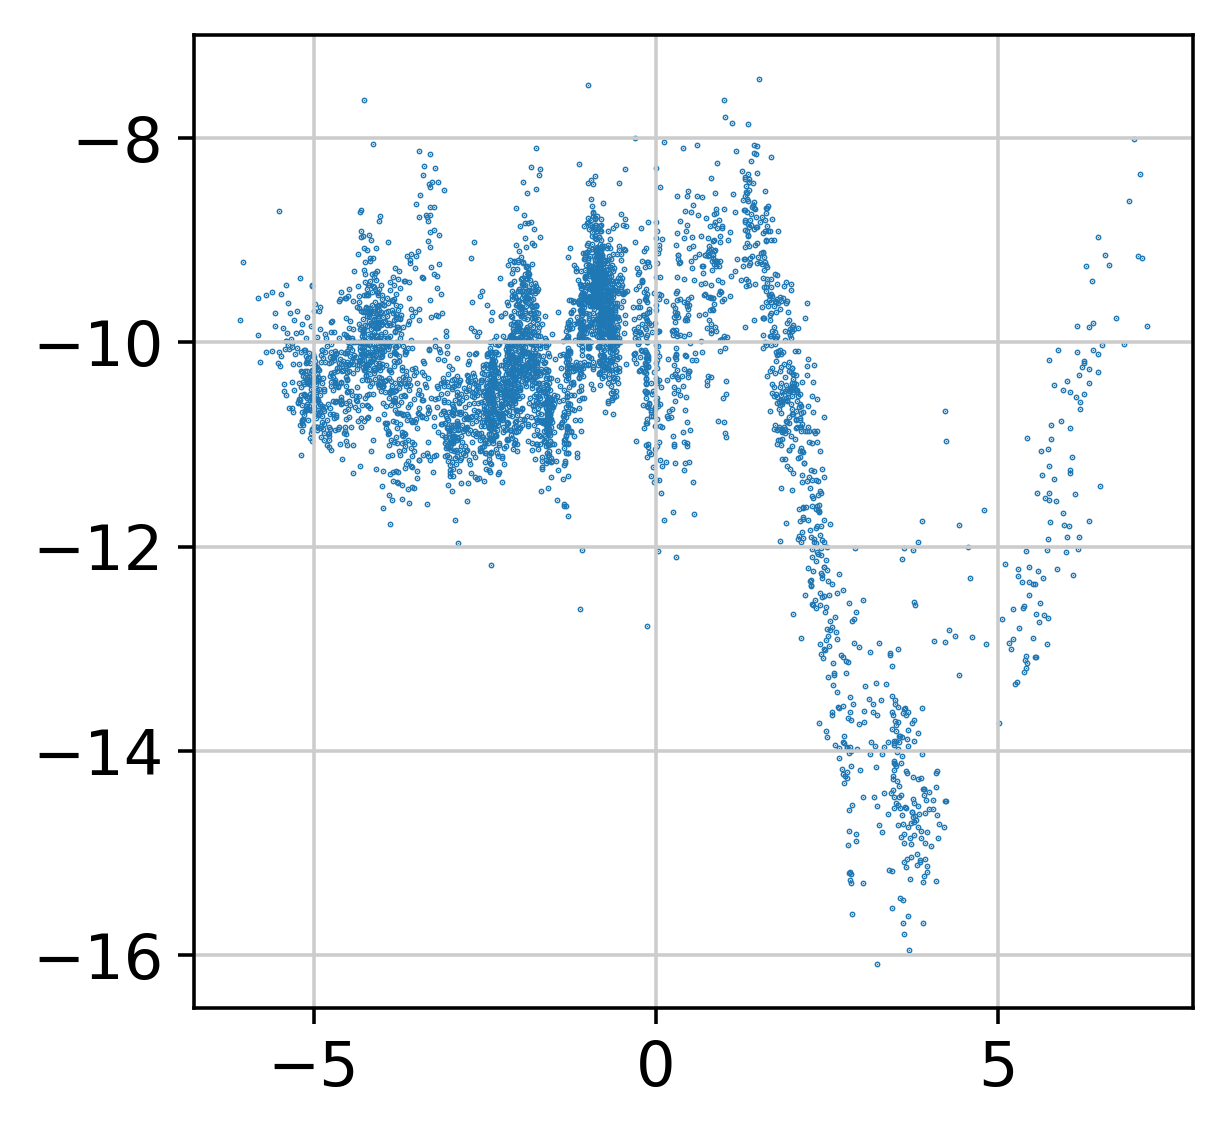

In [20]:
plt.scatter(X,Y, s=0.1)